In [6]:
# Global imports
import shutil
import zipfile
import os
import torch
import urllib.request
from IPython.display import Image, display

In [7]:
# This block make sense only if runned on Google Collaboratory
if os.path.exists('sample_data'):
  shutil.rmtree('sample_data')

In [ ]:
# Clone YOLOv5 Repository
if os.path.exists('yolov5'):
  shutil.rmtree('yolov5/runs')
else:
  !git clone https://github.com/ultralytics/yolov5
  %cd yolov5
  %pip install -r requirements.txt
  %cd ..

In [9]:
# Download and unzip the dataset

if not os.path.isfile('data.zip'):
  urllib.request.urlretrieve("https://github.com/giuseppebrb/BrainTumorDetection/blob/main/data.zip?raw=true", "data.zip")

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

os.remove('data.zip')

In [10]:
# Folder for fine-tuned models
output_folder = 'output_models'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
else :
  os.makedirs(output_folder)

In [11]:
#  Check if cuda available / mps available / only CPU
if torch.cuda.is_available():
  device = 0
else:
  device = 'cpu'

# Training
## Axial Plane Model 

In [9]:
# Training axial plane
!python yolov5/train.py --img 480 --batch 64 --epochs 400 --data ./data/axial/axial.yaml --weights yolov5m.pt --device {device} --name axial --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/axial/weights/best.pt', f'{output_folder}/tumor_detector_axial.pt')

## Coronal Plane Model


In [ ]:
# Training coronal plane
!python yolov5/train.py --img 480 --batch 80 --epochs 200 --data data/coronal/coronal.yaml --weights yolov5m.pt --device 0 --name coronal --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/coronal/weights/best.pt', f'{output_folder}/tumor_detector_coronal.pt')

# Testing the models
## Axial Model

In [18]:
!python yolov5/detect.py --weights output_models/tumor_detector_axial.pt --img 640 --conf 0.4 --source https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg --save-txt



detect: weights=['output_models/tumor_detector_axial.pt'], source=https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
Found https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg locally at b510dc0d5cd3906018c4dd49b98643_gallery.jpeg
YOLOv5  v7.0-294-gdb125a20 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 290 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 D:\projects\tumor_detection\b510dc0d

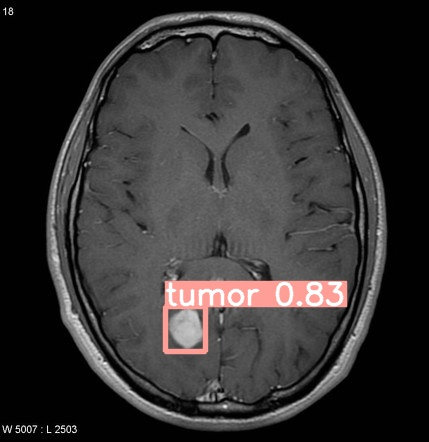

In [19]:
display(Image(filename='yolov5/runs/detect/exp/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg'))

## Coronal Model


In [20]:
!python yolov5/detect.py --weights output_models/tumor_detector_coronal.pt --img 640 --conf 0.4 --source https://www.mriclinicalcasemap.philips.com/content/images/cases/case154/thumbs/14.jpg --save-txt


detect: weights=['output_models/tumor_detector_coronal.pt'], source=https://www.mriclinicalcasemap.philips.com/content/images/cases/case154/thumbs/14.jpg, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1

  0%|          | 0.00/28.0k [00:00<?, ?B/s]
100%|██████████| 28.0k/28.0k [00:00<00:00, 660kB/s]
YOLOv5  v7.0-294-gdb125a20 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 290 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 D:\projects\tumor_detection\14.jpg: 480x640 1 tumor, 59.0ms
Speed: 1.0ms pre-process, 59.0ms inference, 4.0ms 

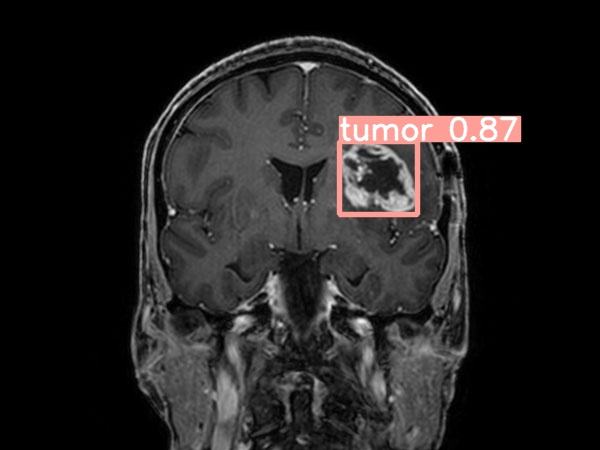

In [21]:
display(Image(filename='yolov5/runs/detect/exp2/14.jpg'))